 House Prices - Advanced Regression Techniques  - Checkpoint 1 deliverable
 
 Team name : The_Art_Of_ML         
 Students : Yunjie Hong , Nicholas Yazdani , Dalya Alqaseer

In [253]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

# 1- Reading the Dataset

In [254]:
trainSet = pd.read_csv('train.csv')
pd.set_option('display.max_rows', trainSet.shape[0]+1)
testSet = pd.read_csv('test.csv')

print ('The train data has {0} rows and {1} columns'.format(trainSet.shape[0],trainSet.shape[1]))

print ('The test data has {0} rows and {1} columns'.format(testSet.shape[0],testSet.shape[1]))


The train data has 1460 rows and 81 columns
The test data has 1459 rows and 80 columns


In [227]:
testSet.info

<bound method DataFrame.info of       MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
0             20       RH         80.0    11622   Pave  No Alley      Reg   
1             20       RL         81.0    14267   Pave  No Alley      IR1   
2             60       RL         74.0    13830   Pave  No Alley      IR1   
3             60       RL         78.0     9978   Pave  No Alley      IR1   
4            120       RL         43.0     5005   Pave  No Alley      IR1   
5             60       RL         75.0    10000   Pave  No Alley      IR1   
6             20       RL          0.0     7980   Pave  No Alley      IR1   
7             60       RL         63.0     8402   Pave  No Alley      IR1   
8             20       RL         85.0    10176   Pave  No Alley      Reg   
9             20       RL         70.0     8400   Pave  No Alley      Reg   
10           120       RH         26.0     5858   Pave  No Alley      IR1   
11           160       RM         21.0     1

In [3]:
trainSet.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [198]:
# Drop ID columns as they are unnecessary in our analysis
trainSet.drop('Id',axis='columns',inplace=True)
testSet.drop('Id',axis='columns',inplace=True)
trainSet.shape



(1460, 80)

In [175]:
testSet.shape

(1459, 79)

#  Data Cleaning


Dealing with Missing Values:
The table below shows the number of missing values in columns with at least one missing value.

In [204]:
#Train Set
missing_value = trainSet.isna().sum()
missing_value = missing_value[missing_value > 0]
percent_missing = missing_value * 100 / trainSet.shape[0]
pd.concat([missing_value, percent_missing], axis=1,
          keys=['Train Missing Values', 'Percentage']).\
          sort_values(by="Train Missing Values", ascending=False)

,Train Missing Values,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


Out of 81 features, 19 features have missing values (in the train dataset)

The percentage of missing values in PoolQC, Miscellaneous feature, Alley, Fence, and FireplaceQu 
is very high (above 40%) and our hypothesis that each house without one of these features has a missing value, 
the following example verifies that :

In [42]:
trainSet["MiscVal"].value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

 So let’s fill the missing values

In [190]:
trainSet["PoolQC"].fillna("No Pool", inplace=True)
trainSet['MiscFeature'].fillna('No feature', inplace=True)
trainSet['Alley'].fillna('No Alley', inplace=True)
trainSet['Fence'].fillna('No Fence', inplace=True)
trainSet['FireplaceQu'].fillna('No Fireplace', inplace=True)
trainSet['LotFrontage'].fillna(0, inplace=True) # 0 means the house is not connected to any street

According to the percentage of missing values table the features Garage Type ,Garage Cond, Garage Qual, Garage Finish, Garage Yr Blt have 81 missing values 

In [191]:
for col in ['GarageType','GarageCond', 'GarageQual','GarageFinish' ]:
  trainSet[col].fillna('No Garage', inplace=True)

trainSet['GarageYrBlt'].fillna(0, inplace=True) # 0 since this is a numerical feature


In [169]:
trainSet[~pd.isna(trainSet['BsmtFinType1']) &
pd.isna(trainSet['BsmtExposure'])]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500


In [170]:
trainSet[~pd.isna(trainSet['BsmtFinType1']) &
pd.isna(trainSet['BsmtFinType2'])]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000


In [55]:
trainSet[~pd.isna(trainSet['BsmtCond']) &
pd.isna(trainSet['BsmtExposure'])]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,No Pool,No Fence,No feature,0,2,2006,WD,Normal,192500


In [192]:
trainSet.loc[~pd.isna(trainSet['BsmtCond']) &
pd.isna(trainSet['BsmtExposure']), "BsmtExposure"] = "No" # No Basement

trainSet.loc[~pd.isna(trainSet['BsmtFinType1']) &
pd.isna(trainSet['BsmtExposure']), "BsmtExposure"] = "No Exposure" 

trainSet.loc[~pd.isna(trainSet['BsmtFinType1']) &
pd.isna(trainSet['BsmtFinType2']), "BsmtFinType2"] = "Unf" # Unfinished


In [56]:
trainSet[~pd.isna(trainSet['BsmtCond']) &
pd.isna(trainSet['BsmtFinType2'])]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,No Pool,No Fence,No feature,0,10,2009,WD,Normal,284000


In [57]:
trainSet[~pd.isna(trainSet['BsmtQual']) &
pd.isna(trainSet['BsmtExposure'])]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
948,949,60,RL,65.0,14006,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0,Unf,0,936,936,GasA,Ex,Y,SBrkr,936,840,0,1776,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2,474,TA,TA,Y,144,96,0,0,0,0,No Pool,No Fence,No feature,0,2,2006,WD,Normal,192500


In [58]:
trainSet[~pd.isna(trainSet['BsmtQual']) &
pd.isna(trainSet['BsmtFinType2'])]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,20,RL,85.0,10655,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,GasA,Ex,Y,SBrkr,1629,0,0,1629,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3,880,TA,TA,Y,0,0,0,0,0,0,No Pool,No Fence,No feature,0,10,2009,WD,Normal,284000


In [193]:
trainSet.loc[~pd.isna(trainSet['BsmtCond']) &
pd.isna(trainSet['BsmtFinType2']), "BsmtFinType2"] = "Unf" 

trainSet.loc[~pd.isna(trainSet['BsmtQual']) &
pd.isna(trainSet['BsmtExposure']), "BsmtExposure"] = "No Exposure" 

trainSet.loc[~pd.isna(trainSet['BsmtQual']) &
pd.isna(trainSet['BsmtFinType2']), "BsmtFinType2"] = "Unf" # Unfinished

for col in ["BsmtCond","BsmtExposure", "BsmtQual","BsmtFinType2",
            "BsmtFinType1" ]:
  trainSet[col].fillna("No Basement", inplace=True)




In [194]:
# Both of the features Mas Vnr Area and Mas Vnr Type have 8 missing values , will fill in these None and 0

trainSet['MasVnrArea'].fillna(0, inplace=True) # 0 for area
trainSet['MasVnrType'].fillna("None", inplace=True) # None indicates No masonry veneer

In [195]:
# Electrical feature has one missing value so will fill in with the value that appears most in the column
trainSet['Electrical'].fillna(trainSet['Electrical'].mode()[0], inplace=True)

In [196]:
trainSet.isna().values.sum()


0

---------------------------------------------------------------------------

In [206]:
#Test Set
missing_value = testSet.isna().sum()
missing_value = missing_value[missing_value > 0]
percent_missing = missing_value * 100 / testSet.shape[0]
pd.concat([missing_value, percent_missing], axis=1,
          keys=['Test Missing Values', 'Percentage']).\
          sort_values(by="Test Missing Values", ascending=False)

,Test Missing Values,Percentage
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageYrBlt,78,5.346127
GarageQual,78,5.346127
GarageFinish,78,5.346127


We notice that there more features with missing values in the test set than in the train set (33 out of 80 features) so let's fill the missing data to produce a complete dataset to use in the training and testing of our model.

In [214]:
testSet["PoolQC"].fillna("No Pool", inplace=True)
testSet['MiscFeature'].fillna('No feature', inplace=True)
testSet['Alley'].fillna('No Alley', inplace=True)
testSet['Fence'].fillna('No Fence', inplace=True)
testSet['FireplaceQu'].fillna('No Fireplace', inplace=True)
testSet['LotFrontage'].fillna(0, inplace=True) # 0 means the house is not connected to any street

In [215]:

for col in ['GarageType','GarageCond', 'GarageQual','GarageFinish' ]:
  testSet[col].fillna('No Garage', inplace=True)

testSet['GarageYrBlt'].fillna(0, inplace=True) # 0 since this is a numerical feature


In [216]:
testSet.loc[~pd.isna(testSet['BsmtCond']) &
pd.isna(testSet['BsmtExposure']), "BsmtExposure"] = "No" # No Basement

testSet.loc[~pd.isna(testSet['BsmtFinType1']) &
pd.isna(testSet['BsmtExposure']), "BsmtExposure"] = "No Exposure" 

testSet.loc[~pd.isna(testSet['BsmtFinType1']) &
pd.isna(testSet['BsmtFinType2']), "BsmtFinType2"] = "Unf" # Unfinished


In [218]:
testSet.loc[~pd.isna(testSet['BsmtCond']) &
pd.isna(testSet['BsmtFinType2']), "BsmtFinType2"] = "Unf" 

testSet.loc[~pd.isna(testSet['BsmtQual']) &
pd.isna(testSet['BsmtExposure']), "BsmtExposure"] = "No Exposure" 

testSet.loc[~pd.isna(testSet['BsmtQual']) &
pd.isna(testSet['BsmtFinType2']), "BsmtFinType2"] = "Unf" # Unfinished

for col in ["BsmtCond","BsmtExposure", "BsmtQual","BsmtFinType2",
            "BsmtFinType1" ]:
  testSet[col].fillna("No Basement", inplace=True)


In [219]:

testSet['MasVnrArea'].fillna(0, inplace=True) # 0 for area
testSet['MasVnrType'].fillna("None", inplace=True) # None indicates No masonry veneer

In [234]:
for col in ["BsmtHalfBath", "BsmtFullBath", "TotalBsmtSF",
            "BsmtUnfSF", "BsmtFinSF2", "BsmtFinSF1" , 'GarageCars', 'GarageArea']:
  testSet[col].fillna(0, inplace=True)

testSet['MSZoning'].fillna('Not Classified', inplace=True)
testSet['Functional'].fillna('No Functionality', inplace=True)
testSet['Utilities'].fillna('No Utilities', inplace=True)
testSet['KitchenQual'].fillna(testSet['KitchenQual'].mode()[0], inplace=True)
testSet['Exterior2nd'].fillna(testSet['Exterior2nd'].mode()[0], inplace=True)
testSet['Exterior1st'].fillna(testSet['Exterior1st'].mode()[0], inplace=True)
testSet['SaleType'].fillna(testSet['SaleType'].mode()[0], inplace=True)


In [235]:
testSet.isna().values.sum()

0

#### Outliers Removal

From documentation, the author recommends removing any houses with more than
4000 square feet from the data set (which eliminates these five unusual observations in GrLivArea and SalePrice)

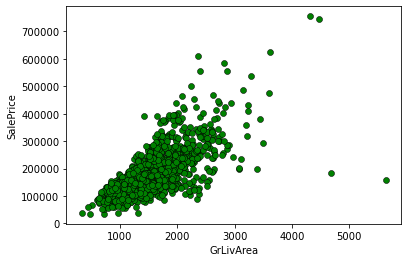

In [255]:
plt.scatter(x=trainSet['GrLivArea'], y=trainSet['SalePrice'],
color="green", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

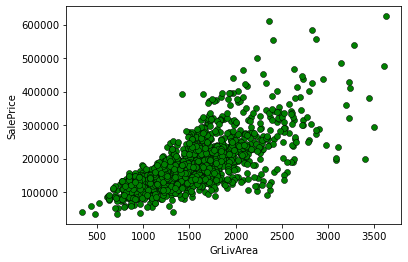

In [256]:
# After removing the unusual data points
trainSet = trainSet[trainSet["GrLivArea"] < 4000]

plt.scatter(x=trainSet['GrLivArea'], y=trainSet['SalePrice'],
color="green", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

In [ ]:
trainSet.reset_index(drop=True, inplace=True) # reset the dataset index after removing outliers

# 3- Exploratory Data Analysis

 In order to build a better model, in this section we will explore the data using visualizations

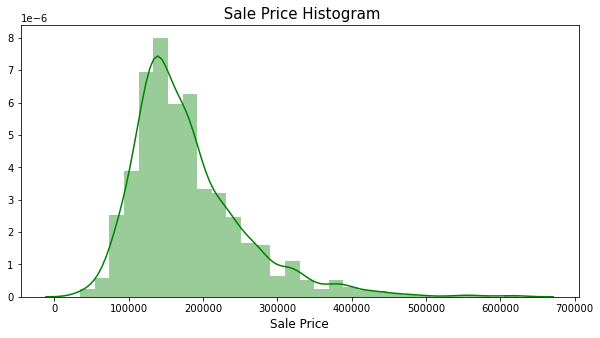

In [239]:
# Log transform target variable
fig, TargetPlot = plt.subplots(figsize=(10,5))

sns.distplot(trainSet.SalePrice, bins=30, kde=True, ax=TargetPlot, color='green')
plt.title(' Sale Price Histogram', fontsize=15)
plt.xlabel('Sale Price', fontsize=12);



we can see from the graph that most house prices fall Between 100K - 250K

In [105]:
print ("The skewness of SalePrice is {}".format(trainSet['SalePrice'].skew()))

The skewness of SalePrice is 1.8828757597682129


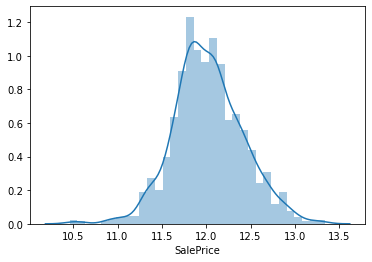

In [242]:
# SalePrice variable is normally distributed
newTarget = sns.distplot(np.log(trainSet.SalePrice))


#### Correlation 

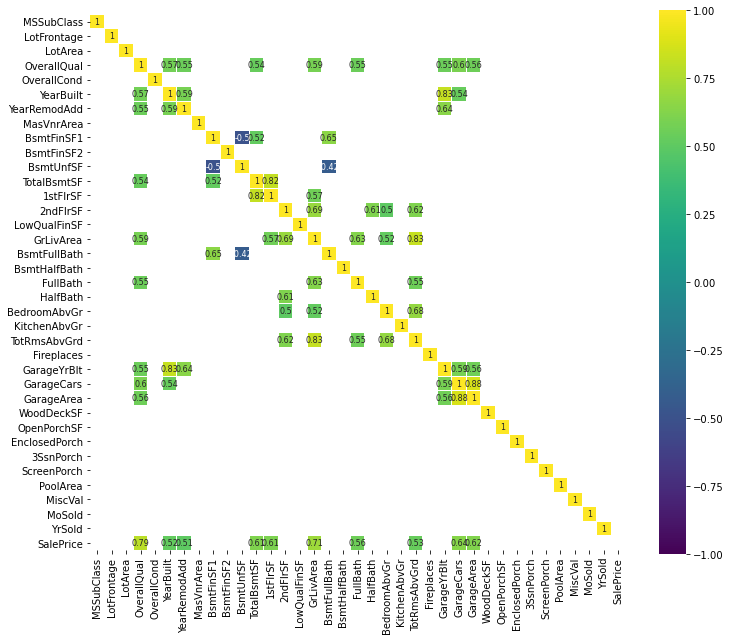

In [124]:
corrMap = trainSet.drop(['Id'], axis=1).corr() # We will examine SalePrice correlations seperately
plt.figure(figsize=(12, 10))

sns.heatmap(corrMap[(corrMap >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

 1 - Relationship between features (predictors) :
we notice that Garage Cars and Garage Area have high positive correlation when the
garage area increases, its car capacity increases too. also that Gr Liv Area and TotRms
AbvGrd are highly positively correlated , when living area above
ground increases, it is expected for the rooms above ground to increase too.

Regarding negative correlation, we can see that Bsmt Unf SF is negatively correlated with
BsmtFin SF 1, when we have more unfinished area, this means that we have less finished area.
In addition to that Bsmt Unf SF is negatively correlated with Bsmt
Full Bath.

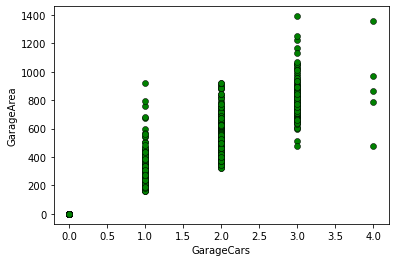

In [257]:
plt.scatter(x=trainSet['GarageCars'], y=trainSet['GarageArea'],
color="green", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GarageCars"); plt.ylabel("GarageArea");

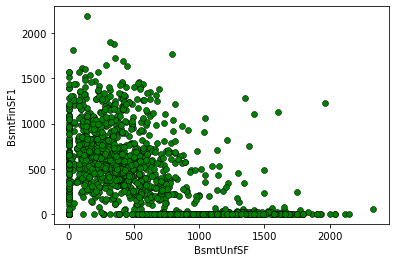

In [258]:
plt.scatter(x=trainSet['BsmtUnfSF'], y=trainSet['BsmtFinSF1'],
color="green", edgecolors="#000000", linewidths=0.5);
plt.xlabel("BsmtUnfSF"); plt.ylabel("BsmtFinSF1");

2 - Relationship between SalePrice and predictors

 According to what we saw in the heatmap, Overall Qual and Gr Liv Area  are highly and positively correlated with 
SalePrice.

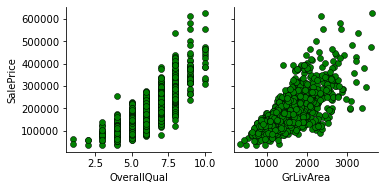

In [259]:
x_vars = ["OverallQual", "GrLivArea"]
g = sns.PairGrid(trainSet, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="green", edgecolors="#000000", linewidths=0.5)

Next, we want to visualize the relationship between the SalePrice
and the variables Year Built, Year Remod, Mas Vnr Area, Total Bsmt
SF, 1st Flr SF, Full Bath, Garage Cars, and Garage Area that are positively and moderately correlated. 


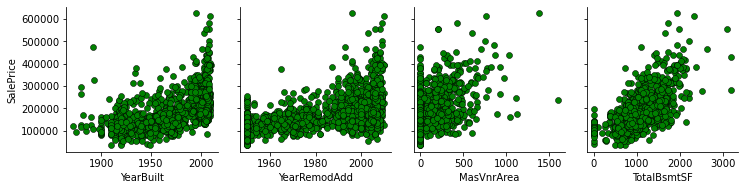

In [260]:
x_vars = ["YearBuilt", "YearRemodAdd", "MasVnrArea", "TotalBsmtSF"]
g = sns.PairGrid(trainSet, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="green", edgecolors="#000000", linewidths=0.5)

Finally we visualize the relationship between SalePrice and the below predictors

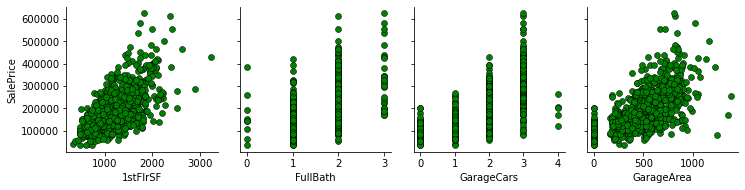

In [261]:
x_vars = ["1stFlrSF", "FullBath", "GarageCars", "GarageArea"]
g = sns.PairGrid(trainSet, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, color="green", edgecolors="#000000", linewidths=0.5);

#### Feature Engineering

In [171]:
numerical_feature =[feature for feature in trainSet.columns if trainSet[feature].dtypes != 'O']
print('The number of numerical variables: ', len(numerical_feature))
trainSet[numerical_feature].head()

The number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [135]:
categorical_feature = [feature for feature in trainSet.columns if trainSet[feature].dtypes == 'O']
print('The number of categorical variables: ', len(categorical_feature))
trainSet[categorical_feature].head(10)

The number of categorical variables:  43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [243]:
# represent MSSubClass and YrSold as a categorical features, to allow for a more flexible relationship with SalePrice
CategoryCols = ["MSSubClass", "YrSold"]
trainSet[CategoryCols] = trainSet[CategoryCols].astype("category")
testSet[CategoryCols] = testSet[CategoryCols].astype("category")


####  Multicollinearity

In [244]:
trainSet.drop(["GarageCars", "TotRmsAbvGrd"], axis=1, inplace=True) #  delete one feature from each pair of Garage Cars
# and Garage Area , Gr Liv Area and TotRms AbvGrd

testSet.drop(["GarageCars", "TotRmsAbvGrd"], axis=1, inplace=True)

In [245]:
# Developing new features based on the existing ones

trainSet['TotalHouseQuality'] = trainSet['OverallQual'] + trainSet['OverallCond']
trainSet["TotalSF"] = trainSet["GrLivArea"] + trainSet["TotalBsmtSF"]
trainSet["TotalPorchSF"] = trainSet["OpenPorchSF"] + trainSet["EnclosedPorch"] + trainSet["3SsnPorch"] + trainSet["ScreenPorch"]
trainSet["TotalBath"] = trainSet["FullBath"] + trainSet["BsmtFullBath"] + 0.5 * (trainSet["BsmtHalfBath"] + trainSet["HalfBath"])
trainSet['BuildingAge'] = 2021 - trainSet['YearBuilt']
trainSet['Total_sqr_footage'] = (trainSet['BsmtFinSF1'] + trainSet['BsmtFinSF2'] +trainSet['1stFlrSF'] + trainSet['2ndFlrSF'])
trainSet['haspool'] = trainSet['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
trainSet['has2ndfloor'] = trainSet['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
trainSet['hasgarage'] = trainSet['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
trainSet['hasbsmt'] = trainSet['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
trainSet['hasfireplace'] = trainSet['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

testSet['TotalHouseQuality'] = testSet['OverallQual'] + testSet['OverallCond']
testSet["TotalSF"] = testSet["GrLivArea"] + testSet["TotalBsmtSF"]
testSet["TotalPorchSF"] = testSet["OpenPorchSF"] + testSet["EnclosedPorch"] + testSet["3SsnPorch"] + testSet["ScreenPorch"]
testSet["TotalBath"] = testSet["FullBath"] + testSet["BsmtFullBath"] + 0.5 * (testSet["BsmtHalfBath"] + testSet["HalfBath"])
testSet['BuildingAge'] = 2021 - testSet['YearBuilt']
testSet['Total_sqr_footage'] = (testSet['BsmtFinSF1'] + testSet['BsmtFinSF2'] +testSet['1stFlrSF'] + testSet['2ndFlrSF'])
testSet['haspool'] = testSet['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
testSet['has2ndfloor'] = testSet['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
testSet['hasgarage'] = testSet['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
testSet['hasbsmt'] = testSet['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
testSet['hasfireplace'] = testSet['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


Ordinal Variables

We will map each one of the possible values of these feature to a number.Please see the following example :


In [157]:
print("Unique values in 'BsmtExposure' column:")
print(trainSet['BsmtExposure'].unique().tolist())

Unique values in 'BsmtExposure' column:
['No', 'Gd', 'Mn', 'Av', nan]


In [246]:
mapOrdinal = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
trainSet['ExterQual'] = trainSet['ExterQual'].map(mapOrdinal)
trainSet['ExterCond'] = trainSet['ExterCond'].map(mapOrdinal)
trainSet['HeatingQC'] = trainSet['HeatingQC'].map(mapOrdinal)
trainSet['KitchenQual'] = trainSet['KitchenQual'].map(mapOrdinal)
mapOrdinal = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
trainSet['BsmtQual'] = trainSet['BsmtQual'].map(mapOrdinal)
trainSet['BsmtCond'] = trainSet['BsmtCond'].map(mapOrdinal)
trainSet['BsmtExposure'] = trainSet['BsmtExposure'].map(
{'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})
mapOrdinal = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
trainSet['BsmtFinType1'] = trainSet['BsmtFinType1'].map(mapOrdinal)
trainSet['BsmtFinType2'] = trainSet['BsmtFinType2'].map(mapOrdinal)
trainSet['FireplaceQu'] = trainSet['FireplaceQu'].map(
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
trainSet['GarageFinish'] = trainSet['GarageFinish'].map(
{'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
trainSet['GarageQual'] = trainSet['GarageQual'].map(
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
trainSet['GarageCond'] = trainSet['GarageCond'].map(
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
trainSet['PoolQC'] = trainSet['PoolQC'].map(
{'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
trainSet['Fence'] = trainSet['Fence'].map(
{'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

#####################################################
mapOrdinal = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
testSet['ExterQual'] = testSet['ExterQual'].map(mapOrdinal)
testSet['ExterCond'] = testSet['ExterCond'].map(mapOrdinal)
testSet['HeatingQC'] = testSet['HeatingQC'].map(mapOrdinal)
testSet['KitchenQual'] = testSet['KitchenQual'].map(mapOrdinal)
mapOrdinal = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
testSet['BsmtQual'] = testSet['BsmtQual'].map(mapOrdinal)
testSet['BsmtCond'] = testSet['BsmtCond'].map(mapOrdinal)
testSet['BsmtExposure'] = testSet['BsmtExposure'].map(
{'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})
mapOrdinal = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
testSet['BsmtFinType1'] = testSet['BsmtFinType1'].map(mapOrdinal)
testSet['BsmtFinType2'] = testSet['BsmtFinType2'].map(mapOrdinal)
testSet['FireplaceQu'] = testSet['FireplaceQu'].map(
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
testSet['GarageFinish'] = testSet['GarageFinish'].map(
{'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
testSet['GarageQual'] = testSet['GarageQual'].map(
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
testSet['GarageCond'] = testSet['GarageCond'].map(
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
testSet['PoolQC'] = testSet['PoolQC'].map(
{'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
testSet['Fence'] = testSet['Fence'].map(
{'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

One Hot Encoding For Categorical Features :

In [247]:
trainSet = pd.get_dummies(trainSet)
testSet = pd.get_dummies(trainSet)

# Conclusion 

We identified 11 categorical variables with highly unbalanced classes in which almost 90% observations have the
value of the most frequent class. However, We decided to not exclude those features for the time being and see
if we will need this data for model improvement. In addition to that, Log transformation has been applied to SalePrice and we may do the same with numerical features later when we train the model.



Since it is a real competition, we believe that the model needs to be excellent in
feature engineering, features selection, regression
methods, parameter selections, and Hybrid Regression model (multiple regression algorithms like Ridge, Lasso
, Gradient boosting and Random Forest)